In [41]:
import json
import sys
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
sys.path.append('/home/zuzanna/Desktop/gan_aug/gan_compare')
%matplotlib inline

In [6]:
metadata_path = "/home/zuzanna/Desktop/gan_aug/gan_compare/metadata/metadata.json"

In [14]:
with open(metadata_path, "r") as metadata_file:
    metadata = json.load(metadata_file)
metadata[:4]

[{'patient_id': '51048972',
  'lesion_id': 4,
  'bbox': [3306, 1332, 19, 21],
  'image_path': '/home/zuzanna/Desktop/gan_aug/InBreast/InBreast/AllDICOMs/51048972_f3e93e889a7746f0_MG_R_CC_ANON.dcm',
  'xml_path': '/home/zuzanna/Desktop/gan_aug/InBreast/InBreast/AllXML/51048972.xml'},
 {'patient_id': '50993643',
  'lesion_id': 1,
  'bbox': [1061, 1970, 23, 23],
  'image_path': '/home/zuzanna/Desktop/gan_aug/InBreast/InBreast/AllDICOMs/50993643_b03f1dd34eb3c55f_MG_L_CC_ANON.dcm',
  'xml_path': '/home/zuzanna/Desktop/gan_aug/InBreast/InBreast/AllXML/50993643.xml'},
 {'patient_id': '51049628',
  'lesion_id': 5,
  'bbox': [746, 1683, 9, 14],
  'image_path': '/home/zuzanna/Desktop/gan_aug/InBreast/InBreast/AllDICOMs/51049628_6f64793857feb5d0_MG_L_ML_ANON.dcm',
  'xml_path': '/home/zuzanna/Desktop/gan_aug/InBreast/InBreast/AllXML/51049628.xml'},
 {'patient_id': '20587080',
  'lesion_id': 0,
  'bbox': [1963, 2026, 68, 66],
  'image_path': '/home/zuzanna/Desktop/gan_aug/InBreast/InBreast/AllDICO

In [18]:
len(metadata)

2628

In [15]:
image_paths = []
patient_ids = []
for metapoint in metadata:
    image_paths.append(metapoint["image_path"])
    patient_ids.append(metapoint["patient_id"])

In [16]:
len(patient_ids), len(set(patient_ids))

(2628, 300)

In [17]:
len(image_paths), len(set(image_paths))

(2628, 300)

In [19]:
import pandas as pd

In [20]:
metadata_df = pd.read_json(metadata_path)

In [21]:
metadata_df.head()

,patient_id,lesion_id,bbox,image_path,xml_path
0,51048972,4,"[3306, 1332, 19, 21]",/home/zuzanna/Desktop/gan_aug/InBreast/InBreas...,/home/zuzanna/Desktop/gan_aug/InBreast/InBreas...
1,50993643,1,"[1061, 1970, 23, 23]",/home/zuzanna/Desktop/gan_aug/InBreast/InBreas...,/home/zuzanna/Desktop/gan_aug/InBreast/InBreas...
2,51049628,5,"[746, 1683, 9, 14]",/home/zuzanna/Desktop/gan_aug/InBreast/InBreas...,/home/zuzanna/Desktop/gan_aug/InBreast/InBreas...
3,20587080,0,"[1963, 2026, 68, 66]",/home/zuzanna/Desktop/gan_aug/InBreast/InBreas...,/home/zuzanna/Desktop/gan_aug/InBreast/InBreas...
4,20587080,1,"[2046, 1952, 134, 129]",/home/zuzanna/Desktop/gan_aug/InBreast/InBreas...,/home/zuzanna/Desktop/gan_aug/InBreast/InBreas...


In [24]:
metadata_df.groupby("patient_id").describe()

lesion_id                                                     
               count       mean        std  min    25%   50%    75%   max
patient_id                                                               
20586908        11.0  18.000000  13.038405  2.0   6.50  12.0  30.00  36.0
20586934        19.0  29.210526  17.681060  0.0  20.50  28.0  44.00  52.0
20586960        12.0  23.833333  12.995337  4.0  13.75  20.5  34.75  42.0
20586986         1.0   1.000000        NaN  1.0   1.00   1.0   1.00   1.0
20587054         3.0   1.000000   1.000000  0.0   0.50   1.0   1.50   2.0
...              ...        ...        ...  ...    ...   ...    ...   ...
53587454         1.0   0.000000        NaN  0.0   0.00   0.0   0.00   0.0
53587572        12.0   7.500000   5.351296  0.0   3.75   7.0  10.50  17.0
53587599        15.0   9.333333   6.553807  0.0   4.50   8.0  13.50  22.0
53587663         8.0   5.500000   2.449490  2.0   3.75   5.5   7.25   9.0
53587717         4.0   5.500000   1.290994  4.0   4.75   5.5   6.25   7.0

[300 rows x 8 columns]

<AxesSubplot:ylabel='Frequency'>

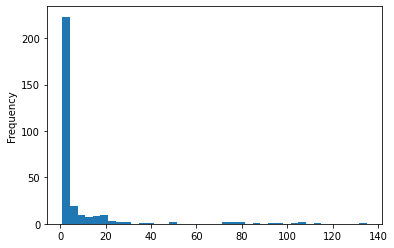

In [27]:
metadata_df.groupby("patient_id")["lesion_id"].count().plot.hist(bins=40)

In [31]:
metadata_df.groupby("patient_id").count().sort_values(by="lesion_id", ascending=False)

,lesion_id,bbox,image_path,xml_path
patient_id,,,,
50997026,135,135,135,135
50996972,112,112,112,112
50997134,107,107,107,107
50993841,105,105,105,105
53582791,103,103,103,103
...,...,...,...,...
50997223,1,1,1,1
20588536,1,1,1,1
20588562,1,1,1,1


In [32]:
metadata_df[metadata_df["patient_id"] == 50997026]

,patient_id,lesion_id,bbox,image_path,xml_path
693,50997026,8,"[2994, 2029, 7, 9]",/home/zuzanna/Desktop/gan_aug/InBreast/InBreas...,/home/zuzanna/Desktop/gan_aug/InBreast/InBreas...
694,50997026,9,"[2974, 1995, 5, 5]",/home/zuzanna/Desktop/gan_aug/InBreast/InBreas...,/home/zuzanna/Desktop/gan_aug/InBreast/InBreas...
695,50997026,10,"[3019, 1983, 9, 8]",/home/zuzanna/Desktop/gan_aug/InBreast/InBreas...,/home/zuzanna/Desktop/gan_aug/InBreast/InBreas...
696,50997026,11,"[2952, 1966, 6, 9]",/home/zuzanna/Desktop/gan_aug/InBreast/InBreas...,/home/zuzanna/Desktop/gan_aug/InBreast/InBreas...
697,50997026,12,"[3025, 1956, 8, 10]",/home/zuzanna/Desktop/gan_aug/InBreast/InBreas...,/home/zuzanna/Desktop/gan_aug/InBreast/InBreas...
...,...,...,...,...,...
823,50997026,160,"[2738, 1442, 13, 12]",/home/zuzanna/Desktop/gan_aug/InBreast/InBreas...,/home/zuzanna/Desktop/gan_aug/InBreast/InBreas...
824,50997026,161,"[2709, 1427, 5, 5]",/home/zuzanna/Desktop/gan_aug/InBreast/InBreas...,/home/zuzanna/Desktop/gan_aug/InBreast/InBreas...
825,50997026,162,"[2716, 1423, 9, 9]",/home/zuzanna/Desktop/gan_aug/InBreast/InBreas...,/home/zuzanna/Desktop/gan_aug/InBreast/InBreas...
826,50997026,166,"[2343, 1346, 9, 5]",/home/zuzanna/Desktop/gan_aug/InBreast/InBreas...,/home/zuzanna/Desktop/gan_aug/InBreast/InBreas...


In [44]:
image_path = metadata_df[metadata_df["patient_id"] == 50997026]["image_path"][693]
xml_filepath = metadata_df[metadata_df["patient_id"] == 50997026]["xml_path"][693]

In [46]:
from gan_compare.data_utils.utils import load_inbreast_mask
import pydicom as dicom

In [47]:
ds = dicom.dcmread(image_path)
with open(xml_filepath, "rb") as patient_xml:
    mask = load_inbreast_mask(patient_xml, ds.pixel_array.shape)

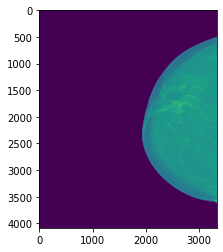

In [48]:
plt.imshow(ds.pixel_array)
plt.show()

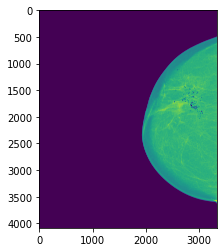

In [49]:
plt.imshow(ds.pixel_array * (1-mask))
plt.show()